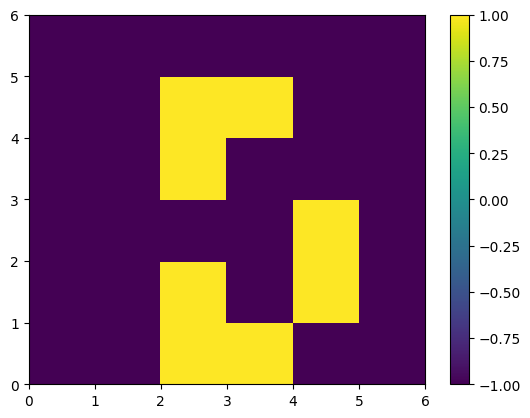

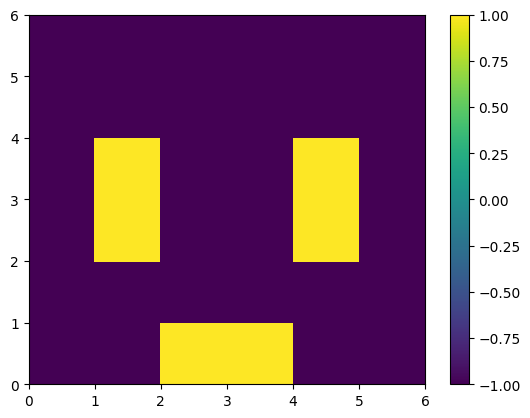

-52.0
-244.0


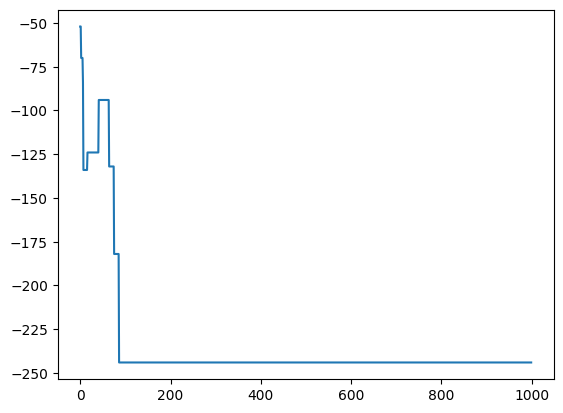

In [3]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random
n=36
l=1000
x1=[-1,-1,1,1,-1,-1,\
    -1,-1,1,1,-1,-1,\
    -1,1,-1,-1,1,-1,\
    -1,1,1,1,1,-1,\
    1,-1,-1,-1,-1,1,\
    1,-1,-1,-1,-1,1]
x2=[-1,1,1,1,-1,-1,\
    -1,1,-1,-1,1,-1,\
    -1,1,1,1,1,-1,\
    -1,1,-1,-1,1,-1,\
    -1,1,-1,-1,1,-1,\
    -1,1,1,1,1,-1]
x3=[-1,-1,-1,1,1,-1,\
    -1,1,1,-1,1,1,\
    1,-1,-1,-1,-1,-1,\
    1,-1,-1,-1,-1,-1,\
    -1,1,1,-1,1,1,\
    -1,-1,-1,1,1,-1]
def plot_map(vector,m,n):
    matrix=[vector [x:x+n] for x in range(0,m*n,n)]
    fig,ax=plt.subplots()
    plt.pcolor(matrix)
    plt.colorbar()
    plt.show()
W=[[0]*n for _ in range(n)]
for i in range(n):
    for j in range (n):
        if i!=j:
            W[i][j]=x1[i]*x1[j]+x2[i]*x2[j]+x3[i]*x3[j]
def calc_energy(xs):
    energy=0
    for i in range(n):
        for j in range(n):
            energy-=xs[i]*W[i][j]*xs[j]
    return energy/2
neurons=[-1,-1,1,1,-1,-1,\
         -1,-1,1,-1,1,-1,\
         -1,-1,-1,-1,1,-1,\
         -1,-1,1,-1,-1,-1,\
         -1,-1,1,1,-1,-1,\
         -1,-1,-1,-1,-1,-1]
nd_x1=np.array(x1)
nd_x2=np.array(x2)
nd_W=np.outer(nd_x1,nd_x2)+np.outer(nd_x2,nd_x2)
history=np.zeros(0)
plot_map(neurons,6,6)
dE=-1
E=calc_energy(neurons)
Eo=E
for k in range(l):
    i=random.randint(0,n-1)
    history=np.append(history,E)
    x=0
    for j in range(n):
        x+=nd_W[i][j]*neurons[j]
        neurons[i]=1.0 if x>0 else -1.0
        E_next=calc_energy(neurons)
        dE=E_next-E
        E=E_next
plot_map(neurons,6,6)
plt.plot([i for i in range(l)],history)
print(Eo)
print(E)